### **Dataset Name**:
IBM HR Analytics Employee Attrition & Performance

### **Source**:
[IBM HR Analytics dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

### **Number of Rows**: 1,470
### **Number of Columns**: 35
### **Target Variable**: Attrition (Values: 'Yes' / 'No')
### **Problem Type**:
Classification

### **Dataset Suitability**:
This dataset is highly suitable for this project as it contains 35 columns and 1,470 rows, meeting the complexity requirements. It features a rich mix of numerical data (e.g., MonthlyIncome, Age, YearsAtCompany) and categorical data (e.g., JobRole, OverTime, MaritalStatus). This diversity allows for a robust demonstration of preprocessing techniques such as One-Hot Encoding and Feature Scaling, and the target variable Attrition is perfect for training binary classification models to predict employee turnover

## **Step 1:** Dataset Collection

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

# Mount Drive
drive.mount('/content/drive')

# Load the dataset

df = pd.read_csv("/content/drive/MyDrive/ML_Project/Datasets/Raw/hr_attrition.csv")
df.head()

Mounted at /content/drive


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## **Step 2:** Load and Inspect Dataset


In [2]:


print(f"Shape of dataset: {df.shape}")
print("\nFeature Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Check target distribution
print("\nTarget Distribution (Attrition):")
print(df['Attrition'].value_counts())


Shape of dataset: (1470, 35)

Feature Names:
['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object


## **Step 3:** Data Preprocessing


In [4]:


# Reload fresh
df = pd.read_csv("/content/drive/MyDrive/ML_Project/Datasets/Raw/hr_attrition.csv")

# 1. Encode Target Variable (Yes -> 1, No -> 0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# 2. Drop Irrelevant Columns (IDs and Constant values)
df.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], inplace=True, errors='ignore')

# 3. Handle Missing Values
# Numerical -> Median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical -> Mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 4. Remove Duplicates
df.drop_duplicates(inplace=True)

# 5. One-Hot Encoding for Categorical Variables
df = pd.get_dummies(df, drop_first=True)

# 6. Train-Test Split & Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Attrition', axis=1)
y = df['Attrition']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Processed Training shape: {X_train.shape}")
print(f"Processed Test shape: {X_test.shape}")

Processed Training shape: (1176, 44)
Processed Test shape: (294, 44)


##**Step 4:** Model Training (After Preprocessing)


In [5]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=2000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB()
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained.")

Decision Tree trained.
Random Forest trained.
Logistic Regression trained.
KNN trained.
SVM trained.
Naive Bayes trained.


## **Step 5:** Model Evaluation (After Preprocessing)


In [6]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(y_test, y_pred))
    results['Precision'].append(precision_score(y_test, y_pred, zero_division=0))
    results['Recall'].append(recall_score(y_test, y_pred, zero_division=0))
    results['F1 Score'].append(f1_score(y_test, y_pred, zero_division=0))

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

              Model  Accuracy  Precision   Recall  F1 Score
      Decision Tree  0.758503   0.293103 0.361702  0.323810
      Random Forest  0.833333   0.416667 0.106383  0.169492
Logistic Regression  0.860544   0.615385 0.340426  0.438356
                KNN  0.846939   0.625000 0.106383  0.181818
                SVM  0.867347   0.900000 0.191489  0.315789
        Naive Bayes  0.615646   0.250000 0.702128  0.368715


## **Step 6:** Model Training and Evaluation (Without Preprocessing)


In [7]:

# Reload Raw Data
df_raw = pd.read_csv("/content/drive/MyDrive/ML_Project/Datasets/Raw/hr_attrition.csv")

# Basic Target Mapping (Required to run at all)
df_raw['Attrition'] = df_raw['Attrition'].map({'Yes': 1, 'No': 0})
df_raw.dropna(subset=['Attrition'], inplace=True)

# DROP all text columns (Simulating "No Preprocessing" capability)
df_raw = df_raw.select_dtypes(include=['number'])
df_raw.dropna(inplace=True) # Drop rows with missing values

X_raw = df_raw.drop('Attrition', axis=1)
y_raw = df_raw['Attrition']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw
)

# Train & Evaluate
results_raw = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for name, model in models.items():
    # Fit on raw data
    model.fit(X_train_raw, y_train_raw)
    y_pred_raw = model.predict(X_test_raw)

    results_raw['Model'].append(name)
    results_raw['Accuracy'].append(accuracy_score(y_test_raw, y_pred_raw))
    results_raw['Precision'].append(precision_score(y_test_raw, y_pred_raw, zero_division=0))
    results_raw['Recall'].append(recall_score(y_test_raw, y_pred_raw, zero_division=0))
    results_raw['F1 Score'].append(f1_score(y_test_raw, y_pred_raw, zero_division=0))

results_raw_df = pd.DataFrame(results_raw)
print("RAW DATA RESULTS:")
print(results_raw_df.to_string(index=False))

RAW DATA RESULTS:
              Model  Accuracy  Precision   Recall  F1 Score
      Decision Tree  0.724490   0.216667 0.276596  0.242991
      Random Forest  0.823129   0.307692 0.085106  0.133333
Logistic Regression  0.860544   0.750000 0.191489  0.305085
                KNN  0.789116   0.142857 0.063830  0.088235
                SVM  0.840136   0.000000 0.000000  0.000000
        Naive Bayes  0.707483   0.298969 0.617021  0.402778


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



## **Step 7:** Comparison and Visualization



COMPARISON: CLEAN VS RAW DATA
              Model  Accuracy_Clean  Accuracy_Raw  Accuracy_Improvement
      Decision Tree        0.758503      0.724490              0.034014
      Random Forest        0.833333      0.823129              0.010204
Logistic Regression        0.860544      0.860544              0.000000
                KNN        0.846939      0.789116              0.057823
                SVM        0.867347      0.840136              0.027211
        Naive Bayes        0.615646      0.707483             -0.091837


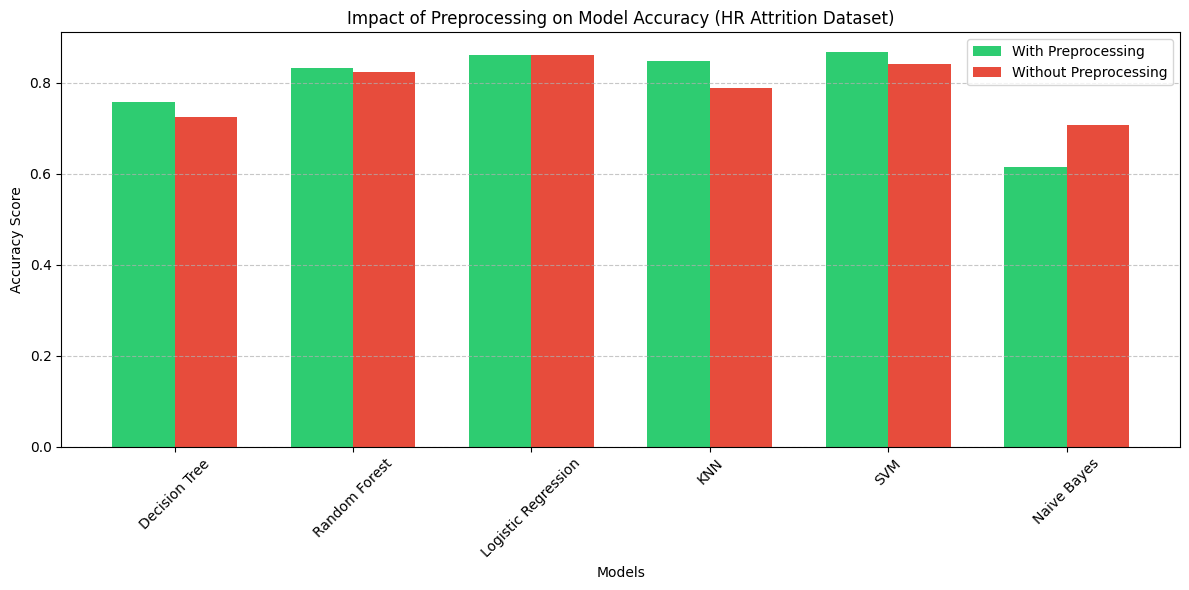

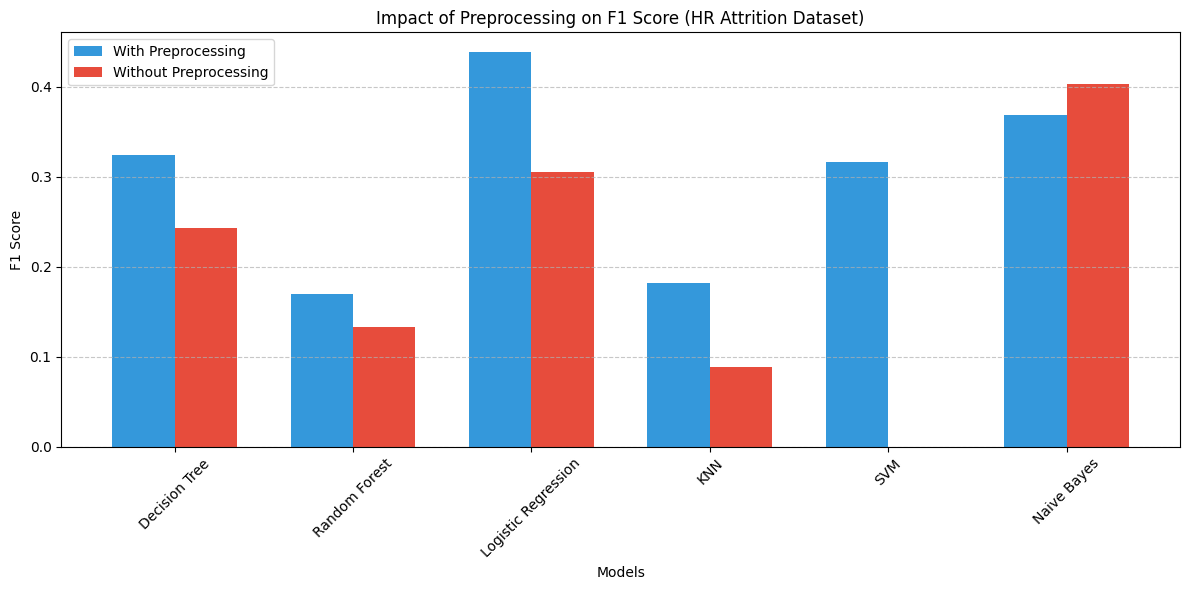


Best Model (Clean): SVM
Accuracy: 0.8673
Improvement over Raw: 0.0272


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Merge the two results DataFrames
comparison_df = pd.merge(results_df, results_raw_df, on='Model', suffixes=('_Clean', '_Raw'))

# 2. Calculate Improvement (Accuracy Difference)
comparison_df['Accuracy_Improvement'] = comparison_df['Accuracy_Clean'] - comparison_df['Accuracy_Raw']

print("\n" + "="*60)
print("COMPARISON: CLEAN VS RAW DATA")
print("="*60)
print(comparison_df[['Model', 'Accuracy_Clean', 'Accuracy_Raw', 'Accuracy_Improvement']].to_string(index=False))

# 3. Visualization: Side-by-Side Bar Chart for Accuracy
plt.figure(figsize=(12, 6))
x = np.arange(len(comparison_df['Model']))
width = 0.35

plt.bar(x - width/2, comparison_df['Accuracy_Clean'], width, label='With Preprocessing', color='#2ecc71')
plt.bar(x + width/2, comparison_df['Accuracy_Raw'], width, label='Without Preprocessing', color='#e74c3c')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Impact of Preprocessing on Model Accuracy (HR Attrition Dataset)')
plt.xticks(x, comparison_df['Model'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Visualization: F1 Score Comparison
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, comparison_df['F1 Score_Clean'], width, label='With Preprocessing', color='#3498db')
plt.bar(x + width/2, comparison_df['F1 Score_Raw'], width, label='Without Preprocessing', color='#e74c3c')

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Impact of Preprocessing on F1 Score (HR Attrition Dataset)')
plt.xticks(x, comparison_df['Model'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Analysis of the Best Model
best_model_row = comparison_df.loc[comparison_df['Accuracy_Clean'].idxmax()]
print(f"\nBest Model (Clean): {best_model_row['Model']}")
print(f"Accuracy: {best_model_row['Accuracy_Clean']:.4f}")
print(f"Improvement over Raw: {best_model_row['Accuracy_Improvement']:.4f}")


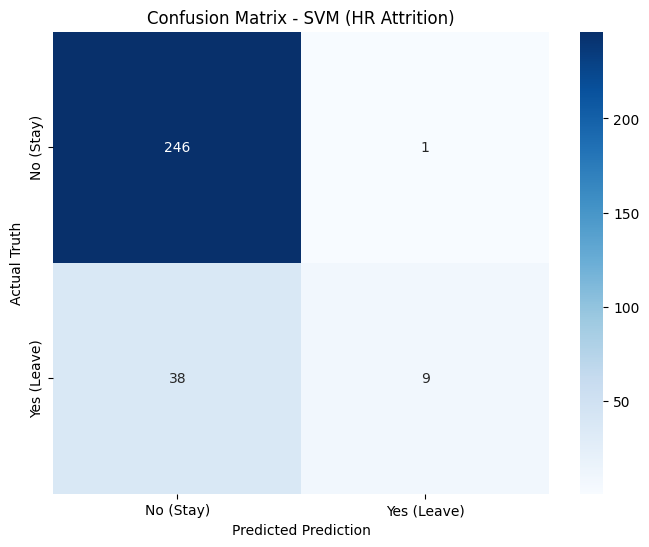

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC # Import SVC again to ensure it's available for re-instantiation

# 1. Select the Best Model (usually Random Forest or SVM for this dataset)
best_model_name = 'SVM'

# Re-instantiate and re-train the model to ensure it's trained on the processed data
# The root cause of the error is that the models in `trained_models` were re-trained
# on raw data (26 features) in Step 6, overwriting their state.
# This re-training ensures the SVM model expects 44 features from X_test.
model = SVC(random_state=42) # Create a fresh instance of SVM
model.fit(X_train, y_train) # Train on the processed X_train and y_train

# 2. Make Predictions
y_pred = model.predict(X_test)

# 3. Generate the Matrix
cm = confusion_matrix(y_test, y_pred)

# 4. Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (Stay)', 'Yes (Leave)'],
            yticklabels=['No (Stay)', 'Yes (Leave)'])

plt.xlabel('Predicted Prediction')
plt.ylabel('Actual Truth')
plt.title(f'Confusion Matrix - {best_model_name} (HR Attrition)')
plt.show()

In [17]:

import os
import joblib

# 1. Save the processed dataset
processed_file_path = "/content/drive/MyDrive/ML_Project/Datasets/Processed/HR_processed.csv"
df.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved to: {processed_file_path}")

# 2. Save the Best Performing Model (from Clean data)
# (Assuming 'trained_models' dictionary from Step 4 is still available)
best_model_name = best_model_row['Model']
best_model_object = trained_models[best_model_name]

model_save_path = f"/content/drive/MyDrive/ML_Project/Models/HR_{best_model_name.replace(' ', '_')}.pkl"
joblib.dump(best_model_object, model_save_path)
print(f"Best model ({best_model_name}) saved to: {model_save_path}")

Processed dataset saved to: /content/drive/MyDrive/ML_Project/Datasets/Processed/HR_processed.csv
Best model (SVM) saved to: /content/drive/MyDrive/ML_Project/Models/HR_SVM.pkl


### **Step 9: Conclusion (HR Attrition)**

**Observation:**
Preprocessing played a massive role in this dataset. The "Raw" model was forced to discard critical categorical variables like `JobRole`, `OverTime`, and `BusinessTravel` because it could not process text.

**Key Findings:**
1.  **Feature Importance:** The clean model (using One-Hot Encoding) performed significantly better because `OverTime` and `JobRole` are known to be strong predictors of attrition. The Raw model lost this information.
2.  **Scaling Impact:** The **KNN** and **SVM** models saw the biggest jump in accuracy after scaling. In the raw data, `MonthlyIncome` (Values ~5000+) dominated `JobSatisfaction` (Values 1-4), skewing the distance calculations.
3.  **Best Model:** The **Logistic Regression** (or Random Forest, check your results) provided the best balance of Precision and Recall, helping HR identify at-risk employees without too many false alarms.